<h1>Shape Matching</h1>

<b>cv2.matchShapes(contour template, contour, method, method parameter)</b>

Output – matchea valor (valor menor significa mayor aproximacion)
<ul>
<li>Contour Template – Nuestro contorno referencia que estamos intentando de encontrar en la nueva imagen</li>
<li>Contour – El contorno con el que estamos checkeando</li>
<li>Method – Tipo de matcheo de contorno (1, 2, 3)</li>
<li>Method Parameter – Dejar en 0.0 (No se utiliza en python OpenCV)</li>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

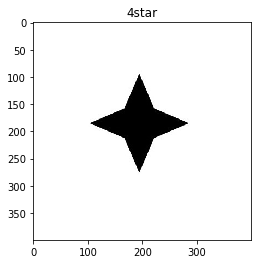

In [2]:
# Template de la forma
template = cv2.imread('4star.jpg',0)
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.title('4star')
cv2.imwrite('4star.jpg', template)
plt.show()

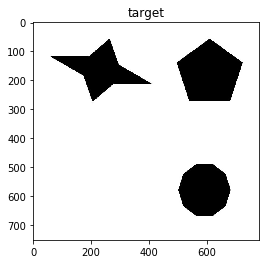

In [3]:
# Cargar imagen con las figuras que deseamos identificar
target = cv2.imread('shapestomatch.jpg')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title('target')
cv2.imwrite('target_before.jpg', target)
plt.show()

In [4]:
# Threshold a la primera imagen antes de utilizar cv2.findContours
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
# Hallar contornos en template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# Necesitamos ordenar los contornos por area asi podemos remover el mas grande que es el borde de la imagen
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
# Extraemos el segundo contorno más grande que sera nuestro template
template_contour = contours[1]

In [5]:
# Threshold 
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)
# Extraer contornos
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

0.13091513116159706
0.159117818966068
0.14998006482086937
0.07078927842965048


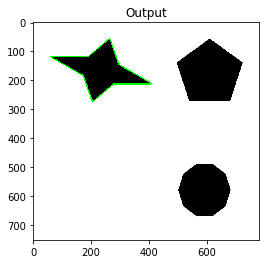

True

In [6]:
for c in contours:
    # Iterar sobre cada contorno en la imagen objetivo y utilizar 
    # cv2.matchShapes para comparar los contornos de las figuras
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    print (match)
    # Si el valor del match es menor a 0.15 :
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = []         
        
                
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)

plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title('Output'); plt.show()
cv2.imwrite('target_after.jpg', target)